# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [14]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
import statsmodels.api as sm

In [11]:
age=[17,51,27,21,36,48,19,26,54,30]
tard=[10,1,5,9,4,2,9,6,0,3]
student_data=pd.DataFrame({'X':age,'Y':tard})
student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

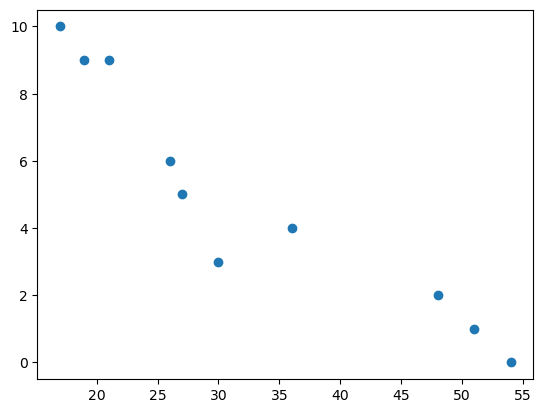

In [13]:
plt.scatter(data=student_data,x='X',y='Y')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
#its seems there is a negative correlation between age and being late


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [17]:
student_data.corr()

,X,Y
X,1.000000,-0.939163
Y,-0.939163,1.000000


In [18]:
student_data.cov()

,X,Y
X,187.655556,-45.566667
Y,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [23]:
# add a constant to x to include the intercept in the regression
x = sm.add_constant(age)

# fit the regression model
model = sm.OLS(age, tard)
results = model.fit()

# print the regression results
print(results.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.327
Model:                            OLS   Adj. R-squared (uncentered):              0.252
Method:                 Least Squares   F-statistic:                              4.375
Date:                Thu, 09 Feb 2023   Prob (F-statistic):                      0.0660
Time:                        16:12:44   Log-Likelihood:                         -47.868
No. Observations:                  10   AIC:                                      97.74
Df Residuals:                       9   BIC:                                      98.04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/Baudouin/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Plot your regression model on your scatter plot.

/Users/Baudouin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

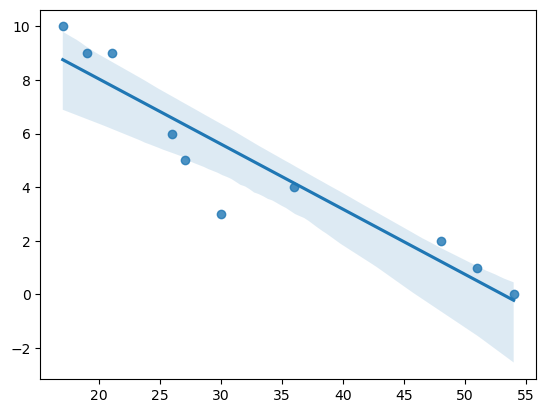

In [24]:
sns.regplot(age,tard)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# age seemes to be a good enough predictor of tardiness but the sample is so small that I would not make any definitive conclusion

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [27]:
data=pd.read_csv('vehicles.csv')
data.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [40]:
b = data.loc[:,('CO2 Emission Grams/Mile','Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year')]

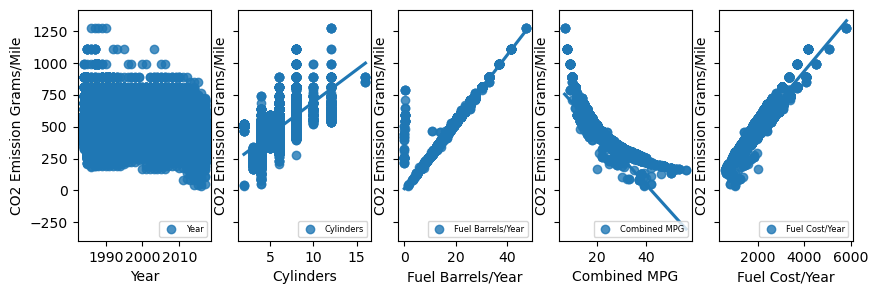

In [36]:
fig, ax = plt.subplots(1, 5, figsize=(10, 3),sharey=True)

for i in range(len(b.columns.to_list())):
        if i!=0:
            sns.regplot(b.iloc[:,i],data.loc[:,'CO2 Emission Grams/Mile'],label=str(b.columns.to_list()[i]),ax=ax[i-1])
            ax[i-1].legend(loc='lower right',prop={'size': 6})

<AxesSubplot:>

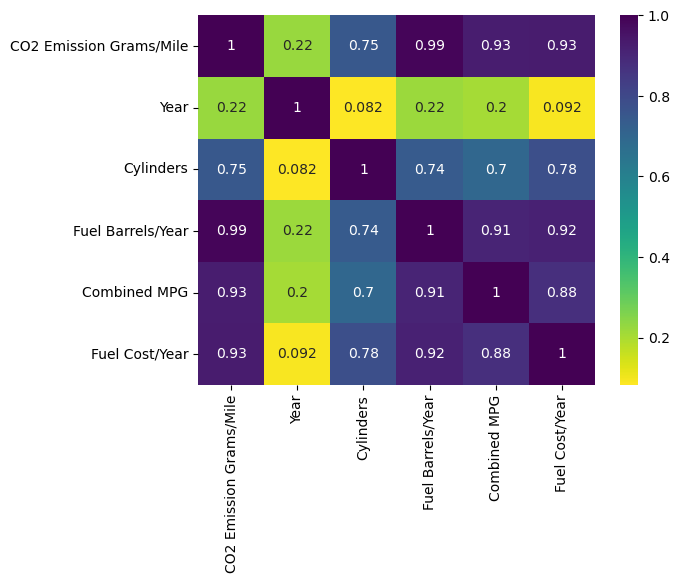

In [43]:
sns.heatmap(np.abs(b.corr()),annot=True, cmap="viridis_r")

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [44]:
b.head()

,CO2 Emission Grams/Mile,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
0,522.764706,1984,4.0,19.388824,17,1950
1,683.615385,1984,6.0,25.354615,13,2550
2,555.437500,1985,4.0,20.600625,16,2100
3,683.615385,1985,6.0,25.354615,13,2550
4,555.437500,1987,6.0,20.600625,16,2550


In [46]:
X = sm.add_constant(data[['Year', 'Cylinders', 'Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']])
Y= data['CO2 Emission Grams/Mile']
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                             16:45:53   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
"""Chat gpt says:
The most important variables in this model are "Fuel Barrels/Year" and "Combined MPG". 
These two variables have the highest t-values and the lowest p-values, indicating that they have the strongest
relationship with the dependent variable "CO2 Emission Grams/Mile". The t-value measures the size of the 
relationship between the independent and dependent variables and the p-value indicates the level of statistical
significance of that relationship. A low p-value (close to 0) means that the relationship is highly 
statistically significant.

It's worth mentioning that the R-squared value is high (0.981), indicating that this model has a strong 
explanatory power for the dependent variable. However, the high kurtosis and skewness values, as well as 
the large condition number, suggest that there may be some issue of multicollinearity or other numerical 
problems in the model.

I couldn't agree more."""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [47]:
invited=[1,3,4,6,8,9,11,14]
attended=[1,2,4,4,5,7,8,13]
parties=pd.DataFrame({'X':invited,'Y':attended})
parties

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

<AxesSubplot:xlabel='X', ylabel='Y'>

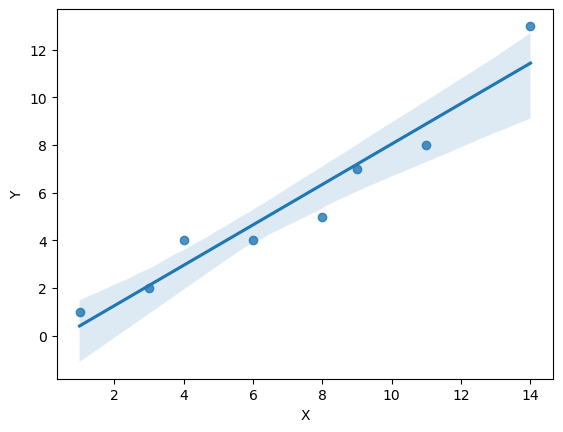

In [49]:
sns.regplot(data=parties,x='X',y='Y')

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [50]:
# add a constant to x to include the intercept in the regression
x = sm.add_constant(invited)

# fit the regression model
model = sm.OLS(invited, attended)
results = model.fit()

# print the regression results
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              320.2
Date:                Thu, 09 Feb 2023   Prob (F-statistic):                    4.20e-07
Time:                        17:08:01   Log-Likelihood:                         -12.701
No. Observations:                   8   AIC:                                      27.40
Df Residuals:                       7   BIC:                                      27.48
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/Baudouin/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              449.6
Date:                Thu, 09 Feb 2023   Prob (F-statistic):                    7.18e-07
Time:                        17:12:32   Log-Likelihood:                         -8.2433
No. Observations:                   7   AIC:                                      18.49
Df Residuals:                       6   BIC:                                      18.43
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/Baudouin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


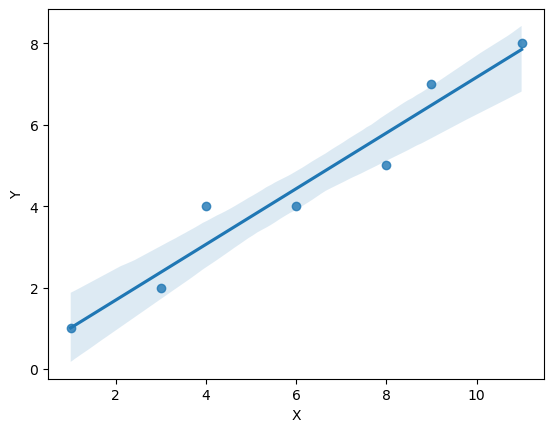

In [52]:
invited2=[1,3,4,6,8,9,11]
attended2=[1,2,4,4,5,7,8]
parties2=pd.DataFrame({'X':invited2,'Y':attended2})
sns.regplot(data=parties2,x='X',y='Y')

# add a constant to x to include the intercept in the regression
x = sm.add_constant(invited2)

# fit the regression model
model = sm.OLS(invited2, attended2)
results = model.fit()

# print the regression results
print(results.summary())

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 